In [127]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import Polygon

In [156]:
mu = 0
sigma = 1
start = -5
end = 5
x = np.arange(start, end, 0.01)
y = stats.norm.pdf(x, mu, sigma)



In [161]:
work_y = y.tolist()
work_x = x.tolist()
y_list = []
x_list = []
y_max = 0
threshold = 68
while y_max <= threshold and len(work_y) > 0:
    work_max = max(work_y)
    index = work_y.index(work_max)
    if(y_max + work_max <= threshold):
        y_max = y_max + work_max
        y_list.append(y_max)
        x_list.append(work_x[index])
        last = work_max
    else:
        break
    work_y.remove(work_max)
    work_x.remove(work_x[index])


In [158]:
sum(y)

99.9999426572988

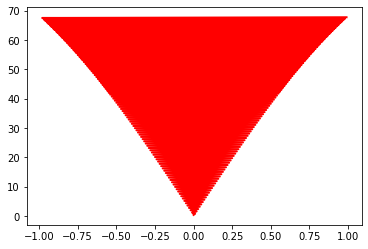

In [162]:
plt.plot(x_list,y_list, linewidth=2, color='r')
plt.show()

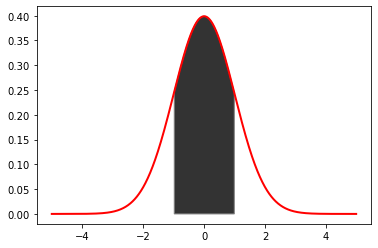

In [163]:
fig, ax = plt.subplots()
ax.plot(x,y, linewidth=2, color='r')
ix = np.linspace(min(x_list), max(x_list))
iy = stats.norm.pdf(ix, mu, sigma)
verts = [(min(x_list), 0), *zip(ix, iy), (max(x_list), 0)]
poly = Polygon(verts, facecolor='0.2', edgecolor='0.5')
ax.add_patch(poly)
plt.show()

In [172]:
# (eat, sleep, procras, study)
m = np.array([[0, 0.4, 0.3, 0.3],
              [0.2, 0.1, 0.15, 0.1],
              [0.2, 0.3, 0.4, 0.2],
              [0.6, 0.2, 0.15, 0.4]])


v = np.array([1, 0, 0, 0])
for i in range(42):
    v = np.matmul(m, v)

v1 = np.array([0, 1, 0, 0])
for i in range(42):
    v1 = np.matmul(m, v1)

v2 = np.array([0, 0, 1, 0])
for i in range(42):
    v2 = np.matmul(m, v2)

v3 = np.array([0, 0, 0, 1])
for i in range(42):
    v3 = np.matmul(m, v3)


In [198]:
v3 = np.matmul(m, v3)
v3

array([0.24134569, 0.13749391, 0.26718674, 0.35397367])

In [2]:
db = pd.read_csv('data.csv', delimiter='\t')

In [6]:
db['class']

0       0
1       0
2       0
3       0
4       0
       ..
1695    2
1696    2
1697    2
1698    2
1699    2
Name: class, Length: 1700, dtype: int64

• Visualize the data and use a different color for each class.

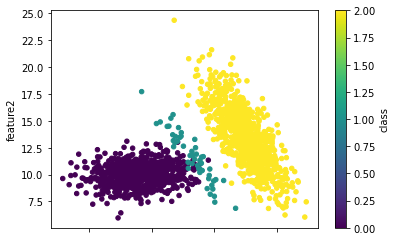

In [4]:
db.plot.scatter(x='feature1', y='feature2', c='class', colormap='viridis')

• Split the dataset into training and test sets. Try different ratios by using
{50, 20, 10, 5}% of the data for training and the rest for testing.

In [15]:
y = db['class'].to_numpy()
X = db[['feature1','feature2']].to_numpy()
#df2[["2005", "2008", "2009"]]

In [16]:
X

array([[ 4.63063453,  8.99521353],
       [ 3.9981945 ,  8.97461825],
       [ 3.80279311,  8.64195365],
       ...,
       [13.82627935, 12.63811916],
       [11.59932811, 15.10193577],
       [10.04237946, 15.59468726]])

In [17]:
ratioTest = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratioTest, random_state=42)

In [18]:
X_train

array([[ 4.6567037 , 10.70132351],
       [ 1.96231964,  9.99522695],
       [ 6.93318999,  9.78674356],
       ...,
       [12.77274829, 14.9337529 ],
       [12.27551977, 14.70283083],
       [11.33476965, 14.68919681]])

In [19]:
colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

In [20]:
n_classes = len(np.unique(y_train))

In [25]:
# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=50, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

<Figure size 432x432 with 0 Axes>

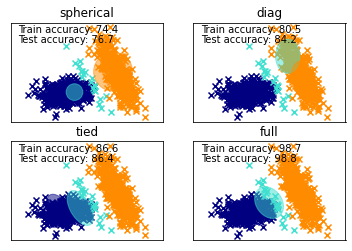

In [27]:
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)


plt.show()